## Convolutional Neural Network

### Mount Drive

In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

### Importing Packages

In [2]:
# Fetching Dataset
import pandas as pd

# Reading Images
import numpy as np
import cv2 as cv

# Scaling Features
from sklearn.preprocessing import MinMaxScaler

# Spliting Train & Test Set
from sklearn.model_selection import train_test_split
# from fast_ml.model_development import train_valid_test_split

# Binarizing Output
from sklearn.preprocessing import LabelBinarizer

# Creating Model
import tensorflow as tf
from tensorflow.keras import layers,models

# Training and Evaluating the Model
from sklearn.metrics import (classification_report, multilabel_confusion_matrix, confusion_matrix)
import seaborn as sb
import matplotlib.pyplot as plt

# Making Predictions

# BD_DB_64


### Fetching Dataset

In [3]:
# dataset_dir = "/content/drive/MyDrive/Dataset/Dataset_Thesis/"
dataset_dir = "/kaggle/input/dataset-thesis/"
dataset = pd.read_csv(dataset_dir + "merged/merged.csv")

In [4]:
dataset

,Filename,District
0,0_16_1_0018_ (222).png,Bagerhat
1,0_14_1_0010_ (45).png,Bagerhat
2,0_14_1_0009_ (45).png,Bagerhat
3,0_16_1_0018_ (221).png,Bagerhat
4,0_16_1_0018_ (225).png,Bagerhat
...,...,...
11515,Thakurgaon_5 (2).jpg,Thakurgaon
11516,Thakurgaon_61.jpg,Thakurgaon
11517,Thakurgaon_19 (2).jpg,Thakurgaon
11518,Thakurgaon_60.jpg,Thakurgaon


In [5]:
X = dataset.iloc[:,0]
y = dataset.iloc[:,1]
print(X.shape)
print(y.shape)

(11520,)
(11520,)


### Reading Images

In [6]:
new_weight = 240
new_height = 80
x_data = np.empty((len(X), new_height, new_weight, 3), dtype=np.int64)
x_data.shape

(11520, 80, 240, 3)

In [7]:
# for i, img_path in enumerate(X):
#   # Reading Image
#   candidate_image = cv.imread(dataset_dir + "merged/raw/" + y[i] + "/" + img_path)
#   # Resizing Image
#   candidate_rs = cv.resize(candidate_image, dsize=(new_weight, new_height))
#   # Converting Image to Grayscale
#   candidate_gray = cv.cvtColor(candidate_rs, cv.COLOR_BGR2GRAY)
#   # Computing a Global Threshold Value from Grayscale Image(Using Otsu's Method) & Converting to Binary Image
#   ret, candidate_bw = cv.threshold(candidate_gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
#   # ret, candidate_bw = cv.threshold(candidate_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
  
#   # print(img_path, end =" ")
#   x_data[i] = candidate_bw

In [8]:
for i, img_path in enumerate(X):
    candidate_image = cv.imread(dataset_dir + "merged/converted_80_240/" + y[i] + "/" + img_path)
    # candidate_rs = cv.resize(candidate_image, dsize=(new_weight, new_height))
    x_data[i] = candidate_image

In [9]:
# plt.imshow(x_data[1], cmap="gray")
# len(x_data[0][0])

In [10]:
X = np.reshape(x_data,(X.shape[0],new_height*new_weight*3))
X.shape

(11520, 57600)

### Scaling Features

In [11]:
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [12]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

### Spliting Train & Test Set


In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=45, stratify=dataset["District"])
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.75, random_state=45, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.60, stratify=y_rem)
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(8640, 57600) (1728, 57600) (1152, 57600) (8640,) (1728,) (1152,)


In [14]:
# print(
#     f'NUMBER OF TARGET IN THE ORIGINAL DATA\n{dataset["District"].value_counts()}\n\n'
#     + f"NUMBER OF TARGET IN THE TRAINING SET\n{y_train.value_counts()}\n\n"
#     + f"NUMBER OF TARGET IN THE TEST SET\n{y_test.value_counts()}\n\n"
#     + f"NUMBER OF TARGET IN THE VALIDATION SET\n{y_val.value_counts()}"
# )

In [15]:
# print(
#     f'RATIO OF TARGET IN THE ORIGINAL DATA\n{dataset["District"].value_counts() / len(dataset)}\n\n'
#     + f"RATIO OF TARGET IN THE TRAINING SET\n{y_train.value_counts() / len(y_train)}\n\n"
#     + f"RATIO OF TARGET IN THE TEST SET\n{y_test.value_counts() / len(y_test)}\n\n"
#     + f"RATIO OF TARGET IN THE VALIDATION SET\n{y_val.value_counts() / len(y_val)}"
# )

In [16]:
X_train = X_train.reshape(-1,new_height,new_weight,3)
X_test = X_test.reshape(-1,new_height,new_weight,3)
X_val = X_val.reshape(-1,new_height,new_weight,3)
print(X_train.shape, X_test.shape, X_val.shape)

(8640, 80, 240, 3) (1728, 80, 240, 3) (1152, 80, 240, 3)


### Binarizing Output

In [17]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
y_val = lb.fit_transform(y_val)
print(y_train.shape, y_test.shape, y_val.shape)

(8640, 64) (1728, 64) (1152, 64)


In [18]:
print(y_train)
print(y_test)
print(y_val)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
print(y_train.shape)
print(y_test.shape)

(8640, 64)
(1728, 64)


### Creating Model


In [20]:
# import datetime
# from tensorflow.keras.callbacks import TensorBoard
# log_dir = "logs/vgg19/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [21]:
num_classes = dataset.District.nunique()
input_shape = (new_height, new_weight, 3)
# input_shape = X.shape

In [22]:
# Set hyperparameters
dropout_rate = 0.5

In [23]:
# Load the pre-trained model
vgg19 = tf.keras.applications.VGG19(weights='imagenet',input_shape=input_shape, include_top=False)

# Freeze the weights of the pre-trained layers
for layer in vgg19.layers:
    layer.trainable = False

# Add your custom layers to the top of the pre-trained model
vgg19_model = models.Sequential()
vgg19_model.add(vgg19)
vgg19_model.add(layers.Flatten())
vgg19_model.add(layers.Dense(units=num_classes, activation='softmax'))

80134624/80134624 [==============================] - 1s 0us/step


In [24]:
vgg19_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 7168)              0         
                                                                 
 dense (Dense)               (None, 64)                458816    
                                                                 
Total params: 20,483,200
Trainable params: 458,816
Non-trainable params: 20,024,384
_________________________________________________________________


In [25]:
# !pip install visualkeras
# import visualkeras

In [26]:
# visualkeras.layered_view(vgg19_model, legend=True, draw_volume=False)

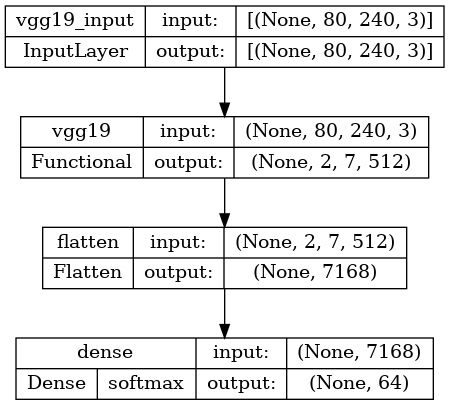

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(vgg19_model, to_file='vgg19_model.png', show_shapes=True, show_layer_activations=True)

### Training & Evaluating the Model


In [28]:
epochs = 25
k = 5

In [29]:
vgg19_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy','top_k_categorical_accuracy'])

In [30]:
# history  = vgg19_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[tensorboard_callback])
history  = vgg19_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)

Epoch 1/25
270/270 [==============================] - 1348s 5s/step - loss: 2.1963 - accuracy: 0.4729 - top_k_categorical_accuracy: 0.7446 - val_loss: 1.2311 - val_accuracy: 0.7179 - val_top_k_categorical_accuracy: 0.9366
Epoch 2/25
270/270 [==============================] - 1290s 5s/step - loss: 0.7744 - accuracy: 0.8439 - top_k_categorical_accuracy: 0.9778 - val_loss: 0.8467 - val_accuracy: 0.8012 - val_top_k_categorical_accuracy: 0.9635
Epoch 3/25
270/270 [==============================] - 1339s 5s/step - loss: 0.4506 - accuracy: 0.9234 - top_k_categorical_accuracy: 0.9929 - val_loss: 0.6423 - val_accuracy: 0.8542 - val_top_k_categorical_accuracy: 0.9696
Epoch 4/25
270/270 [==============================] - 1282s 5s/step - loss: 0.2913 - accuracy: 0.9600 - top_k_categorical_accuracy: 0.9972 - val_loss: 0.5708 - val_accuracy: 0.8672 - val_top_k_categorical_accuracy: 0.9731
Epoch 5/25
270/270 [==============================] - 1284s 5s/step - loss: 0.2046 - accuracy: 0.9759 - top_k_ca

In [31]:
# history_test = vgg19_model.evaluate(X_test, y_test, callbacks=[tensorboard_callback])
history_test = vgg19_model.evaluate(X_test, y_test)

54/54 [==============================] - 239s 4s/step - loss: 0.2941 - accuracy: 0.9201 - top_k_categorical_accuracy: 0.9884


In [32]:
# y_predicted = vgg19_model.predict(X_test)

In [33]:
# y_test_label = lb.inverse_transform(y_test)
# y_predicted_label = lb.inverse_transform(y_predicted)

In [34]:
# print("Classification Report:")
# clr = classification_report(y_test_label, y_predicted_label)
# print(clr)

In [35]:
# print("Confusion Matrix:")
# multilabel_cm = multilabel_confusion_matrix(y_test_label, y_predicted_label)
# cm = confusion_matrix(y_test_label, y_predicted_label)
# print(cm)

In [36]:
# cm_df = pd.DataFrame(cm, index = dataset.District.unique(), columns = dataset.District.unique())
# plt.figure(figsize=(20,20))
# cm_plot = sb.heatmap(cm_df, cmap="YlGnBu", annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Class')
# plt.xlabel('Predicted Class')
# plt.show(cm_plot)

In [37]:
# !zip -r logs.zip logs/